# Import Modules

In [2]:
#pip install collections
#pip install sklearn
#pip install requests
#pip install fuzzywuzzy
#pip install pandas
#pip install numpy
#pip install nltk

#python -m spacy download en_core_web_sm

#request.txt


In [1]:
import pandas as pd
import numpy as np
import requests
from fuzzywuzzy import fuzz
from sklearn.cluster import DBSCAN
import re
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import matplotlib.pyplot as plt

# Ensure NLTK data is downloaded
nltk.download('stopwords')
nltk.download('wordnet')

#import files
#df = pd.read_csv('cleandata_processed.csv', index_col=0)
#df = pd.read_excel(io ='/Users/antoniodrakes/Desktop/Voxcroft/new_data.xlsx') #Antonio's dataframe read-in
#df = pd.read_csv('newdata.csv') #Lydia's dataframe read-in



/Applications/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lydiajung/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lydiajung/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
df = pd.read_csv('newdata.csv') #Lydia's dataframe read-in

# TFIDF

In [ ]:



# Initialize NLTK stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Additional custom stopwords
additional_stopwords = {
    'according', 'actually', 'almost', 'already', 'although', 'always', 'another',
    'anything', 'around', 'away', 'believe', 'better', 'business', 'certain',
    'comes', 'concerning', 'consider', 'different', 'enough', 'especially',
    'everyone', 'everything', 'exactly', 'finally', 'following', 'happens', 'however',
    'important', 'includes', 'including', 'information', 'instead', 'involves', 
    'least', 'maybe', 'might', 'much', 'often', 'once', 'others', 'perhaps', 
    'possible', 'probably', 'provides', 'rather', 'recent', 'seems', 'several', 
    'something', 'sometimes', "https", "com", "one", "two", "three", "four", "five", "six", "seven", "eight", 
    "nine", "ten", "read", "new", "old", "also", "people", "person",
    "comment", "first", "last", "time", "said", "like", "says", "could", "social", "media",
    "january", "february", "march", "april", "may", "june", "july", "august", 
    "september", "october", "november", "december",
    "monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday",
    "day", "week", "month", "year", "today", "tomorrow", "yesterday",
    "get", "go", "back", "make", "way", "come", "keep", "take", "put", 
    "thing", "think", "look", "see", "know", "use", "want", "need", 
    "good", "bad", "great", "best", "better", "worst", "well", "much", 
    "little", "big", "small", "large", "old", "young", "experience"
}

# Combine NLTK stopwords with additional stopwords
all_stopwords = set(stopwords.words('english')).union(additional_stopwords)

# Function to preprocess text
def preprocess_text(text):
    if not isinstance(text, str):
        return []
    text = text.lower()  # Lowercase
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'\W+', ' ', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    words = text.split()
    words = [word for word in words if word not in all_stopwords]  # Remove stopwords
    return words  # Return list of words instead of joined string


# Apply preprocessing to 'Article_Body'
df['Processed_Words'] = df['Article_Body'].apply(preprocess_text)

# Function to apply stemming to a list of words
def stem_words(words):
    return [stemmer.stem(word) for word in words]

# Function to apply lemmatization to a list of words
def lemmatize_words(words):
    return [lemmatizer.lemmatize(word) for word in words]

# Apply stemming and lemmatization to 'Processed_Words'
df['Processed_Words'] = df['Processed_Words'].apply(stem_words)
df['Processed_Words'] = df['Processed_Words'].apply(lemmatize_words)

# Display the head of the DataFrame to confirm changes
print("\nDataFrame head after stemming and lemmatization:")
print(df.head())


In [39]:
# Get the sum of TF-IDF scores for each word
tfidf_scores = tfidf_matrix.sum(axis=0).A1
tfidf_scores_df = pd.DataFrame({'Word': feature_names, 'TF-IDF Score': tfidf_scores})

# Sort by TF-IDF score
tfidf_scores_df = tfidf_scores_df.sort_values(by='TF-IDF Score', ascending=False)




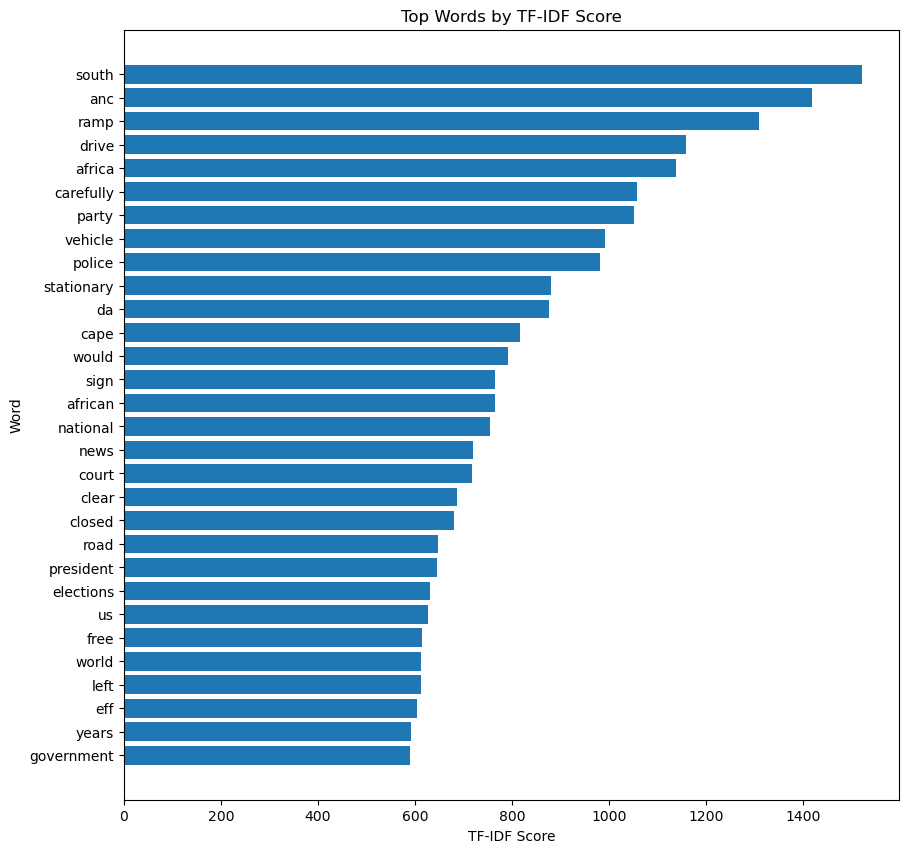

In [40]:
#  Plot the top N words by TF-IDF score
top_n = 30  # Number of top words to plot
plt.figure(figsize=(10, 10))
plt.barh(tfidf_scores_df['Word'].head(top_n), tfidf_scores_df['TF-IDF Score'].head(top_n))
plt.xlabel('TF-IDF Score')
plt.ylabel('Word')
plt.title('Top Words by TF-IDF Score')
plt.gca().invert_yaxis()
plt.show()

In [10]:
df.head()

,Article_URL,Article_Date_Published,Article_Body,Article_Content_People_AI_Model,Article_Content_Entities_AI_Model,Article_Source,Voice,Article_Themes_AI_Model,Article_Subject_Keyword_Identified,Article_Topic_Keyword_Identified
0,https://twitter.com/TimesLIVE/status/176335098...,3/1/24 1:50,The University of Johannesburg has confirmed t...,NaN,The University of Johannesburg|https://t.co/os...,twitter.com,Times LIVE,"[Primary: Crime, law and justice|51% |Secondar...",Johannesburg|South Africa,Crime & Terrorism
1,https://briefly.co.za/business-economy/economy...,3/1/24 1:49,French economist Gabriel Zucman speaks during ...,Gabriel Zucman|Nelson ALMEIDA|Gabriel Zucman|Z...,G20|AFP|Group|AFP|the UC Berkeley|Paris School...,briefly.co.za,NaN,"[Primary: Economy, business and finance|100% |...",NaN,Civil Unrest & Protest|Leadership delivery
2,https://twitter.com/i_trafficKZN/status/176334...,3/1/24 1:38,162725: Stationary Vehicle on N3 Eastbound aft...,Ramp|Ramp,NaN,twitter.com,i-traffic KZN,"[Primary: Disaster, accident and emergency inc...",NaN,Natural Disasters
3,https://twitter.com/i_trafficKZN/status/176334...,3/1/24 1:35,162726: Stationary Vehicle on N3 Westbound aft...,Ramp|Cliffdale I/C|Sterkspruit Road|Ramp|Cliff...,NaN,twitter.com,i-traffic KZN,"[Primary: Disaster, accident and emergency inc...",NaN,Natural Disasters
4,https://briefly.co.za/facts-lifehacks/celebrit...,3/1/24 1:33,Coco Gauff is an American professional tennis ...,Coco Gauff|Venus Williams|Coco Gauff's|Coco Ga...,@cocogauff|Instagram|@cocogauff|Georgia State ...,briefly.co.za,Bennett Yates,"[Primary: Arts, culture, entertainment and med...",NaN,Civil Unrest & Protest|Human Rights|State Secu...


# Data Cleaning [Lydia & Molly]

Position and Frequency [Lydia]

In [22]:
#to shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [23]:

# to run for whole `dataset use subset = df`
#subset = df
subset = df[:10000]

#create a new empty dataset to add
df_new = pd.DataFrame(columns=df.columns)
#the column with the name or entity name
df_new.rename(columns={'Article_Content_People_AI_Model': 'Name'}, inplace=True)
#the type, either people or entity
df_new.rename(columns={'Article_Content_Entities_AI_Model': 'Identity_Type'}, inplace=True)
#new column with the position of the name relative to the others in the article
df_new['Position'] = np.nan
#new column with the article associated
df_new['Article'] = np.nan
#new column with the frequency of a name in an article
df_new['Frequency'] = np.nan
#new column with Name Cluster
df_new['Cluster'] = np.nan
#new column with Best Name 
df_new['Best Name'] = np.nan
#new column with Probability Score 
df_new['Probability Score'] = np.nan

#for the regex below
import re

#separate the strings into arrays
for num in range(0, len(subset)):
    subset.at[num, 'Article_Content_People_AI_Model'] = str(subset['Article_Content_People_AI_Model'][num]).split("|")
    subset.at[num, 'Article_Content_Entities_AI_Model'] = str(subset['Article_Content_Entities_AI_Model'][num]).split("|")
    subset.at[num, 'Article_Subject_Keyword_Identified'] = str(subset['Article_Subject_Keyword_Identified'][num]).split("|")
    subset.at[num, 'Article_Topic_Keyword_Identified'] = str(subset['Article_Topic_Keyword_Identified'][num]).split("|")
    subset.at[num, 'Article_Themes_AI_Model'] = str(subset['Article_Themes_AI_Model'][num]).strip("[")
    subset.at[num, 'Article_Themes_AI_Model'] = str(subset['Article_Themes_AI_Model'][num]).strip(" ]")
    subset.at[num, 'Article_Themes_AI_Model'] = str(subset['Article_Themes_AI_Model'][num]).replace("Primary: ", "")
    subset.at[num, 'Article_Themes_AI_Model'] = str(subset['Article_Themes_AI_Model'][num]).replace("Secondary: ", "")
    subset.at[num, 'Article_Themes_AI_Model'] = re.sub(r'\|\d{2,}%', "", str(subset['Article_Themes_AI_Model'][num]))
    subset.at[num, 'Article_Themes_AI_Model'] = str(subset['Article_Themes_AI_Model'][num]).replace("]", "")
    subset.at[num, 'Article_Themes_AI_Model'] = str(subset['Article_Themes_AI_Model'][num]).replace("[", "|")
    subset.at[num, 'Article_Themes_AI_Model'] = str(subset['Article_Themes_AI_Model'][num]).split(" |")

    #add the people names
newdf_counter = 0
olddf_counter = -1
article_counter = 0
for entry in subset['Article_Content_People_AI_Model']:
    olddf_counter+=1
    position_counter = 0
    for word in entry:
        if entry.index(word) < position_counter:
            df_new.loc[newdf_counter - position_counter + entry.index(word), 'Position']+=("|"+str(position_counter))
            break
        df_new.loc[newdf_counter, 'Name'] = word
        df_new.loc[newdf_counter, 'Identity_Type'] = 'People'
        df_new.loc[newdf_counter, 'Position'] = str(position_counter)
        df_new.loc[newdf_counter, 'Article'] = article_counter
        df_new.loc[newdf_counter, 'Article_Date_Published'] = subset.loc[olddf_counter, 'Article_Date_Published']
        df_new.loc[newdf_counter, 'Article_Body'] = subset.loc[olddf_counter, 'Article_Body']
        df_new.loc[newdf_counter, 'Article_Source'] = subset.loc[olddf_counter, 'Article_Source']
        df_new.loc[newdf_counter, 'Voice'] = subset.loc[olddf_counter, 'Voice']
        df_new.at[newdf_counter, 'Article_Themes_AI_Model'] = list(set(subset.at[olddf_counter, 'Article_Themes_AI_Model']))
        df_new.at[newdf_counter, 'Article_Subject_Keyword_Identified'] = subset.at[olddf_counter, 'Article_Subject_Keyword_Identified']
        df_new.at[newdf_counter, 'Article_Topic_Keyword_Identified'] = subset.at[olddf_counter, 'Article_Topic_Keyword_Identified']
        df_new.at[newdf_counter, 'Article_URL'] = subset.at[olddf_counter, 'Article_URL']
        newdf_counter+=1
        position_counter+=1
    article_counter+=1

    #add the entity names
newdf_counter = len(df_new)
olddf_counter = -1
article_counter = 0
for entry in subset['Article_Content_Entities_AI_Model']:
    olddf_counter+=1
    position_counter = 0
    for word in entry:
        if entry.index(word) < position_counter:
            df_new.loc[newdf_counter - position_counter + entry.index(word), 'Position']+=("|"+str(position_counter))
            break
        df_new.loc[newdf_counter, 'Name'] = word
        df_new.loc[newdf_counter, 'Identity_Type'] = 'Entity'
        df_new.loc[newdf_counter, 'Position'] = str(position_counter)
        df_new.loc[newdf_counter, 'Article'] = article_counter
        df_new.loc[newdf_counter, 'Article_Date_Published'] = subset.loc[olddf_counter, 'Article_Date_Published']
        df_new.loc[newdf_counter, 'Article_Body'] = subset.loc[olddf_counter, 'Article_Body']
        df_new.loc[newdf_counter, 'Article_Source'] = subset.loc[olddf_counter, 'Article_Source']
        df_new.loc[newdf_counter, 'Voice'] = subset.loc[olddf_counter, 'Voice']
        df_new.at[newdf_counter, 'Article_Themes_AI_Model'] = list(set(subset.at[olddf_counter, 'Article_Themes_AI_Model']))
        df_new.at[newdf_counter, 'Article_Subject_Keyword_Identified'] = subset.at[olddf_counter, 'Article_Subject_Keyword_Identified']
        df_new.at[newdf_counter, 'Article_Topic_Keyword_Identified'] = subset.at[olddf_counter, 'Article_Topic_Keyword_Identified']
        df_new.at[newdf_counter, 'Article_URL'] = subset.at[olddf_counter, 'Article_URL']
        newdf_counter+=1
        position_counter+=1
    article_counter+=1

    distinct_names = df_new['Name'].unique()

for num in range(0, len(df_new)):
    df_new.at[num, 'Position'] = str(df_new['Position'][num]).split("|")
    df_new.at[num, 'Frequency'] = len(df_new['Position'][num])


# Initialize 'Inter Frequency' column with zeros
df_new['Inter Frequency'] = np.zeros(len(df_new))

# Calculate name counts and merge back into df_new
name_counts = df_new['Name'].value_counts()
df_new = df_new.merge(name_counts, on='Name', how='left')
df_new.rename(columns={'count': 'Name_Count'}, inplace=True)
df_new.drop(columns=['Name_Count'], inplace=True)

# Extract unique subjects, topics, and themes
theme_list = []
for entry in df_new['Article_Themes_AI_Model']:
    for word in entry:
        if word != entry:
            theme_list.append(word)
unique_themes = list(set(theme_list))

subject_list = []
for entry in df_new['Article_Subject_Keyword_Identified']:
    for word in entry:
        if word != 'nan':
            subject_list.append(word)
unique_subjects = list(set(subject_list))

topic_list = []
for entry in df_new['Article_Topic_Keyword_Identified']:
    for word in entry:
        if word != 'nan':
            topic_list.append(word)
unique_topics = list(set(topic_list))

# Function to map topics to numeric keys, need to do this better to generlize
def map_topics(topic_list):
    for topic in topic_list:
        if topic == 'nan':
            return
        else:
            return [unique_topics.index(topic) for topic in topic_list]
        
def map_subjects(subject_list):
    for subject in subject_list:
        if subject =='nan':
            return
        else:
            return [unique_subjects.index(subject) for subject in subject_list]

def map_themes(theme_list):
    for theme in theme_list:
        if theme == 'nan':
            return
        else:
            return [unique_themes.index(theme) for theme in theme_list]

# Apply the mapping function to 'Topic Key' column
df_new['Topic Key'] = df_new['Article_Topic_Keyword_Identified'].apply(map_topics)
df_new['Subject Key'] = df_new['Article_Subject_Keyword_Identified'].apply(map_subjects)
df_new['Theme Key'] = df_new['Article_Themes_AI_Model'].apply(map_themes)


#df_new = pd.merge(df_new, df[['Article_Body', 'Processed_Words']], on=['Article_Body' ], how='left')
#df_new.drop(columns=['Article_Body'], inplace=True)
#df_new.rename(columns={'Processed_Words_y': 'Processed_Words'}, inplace=True)


# Save the processed DataFrame to CSV
df_new.to_csv('data_processed.csv', index=False)

df = df_new
# Optionally, uncomment the line below to save df_new to a different CSV file
# df_new.to_csv('cleandata_0619.csv', index=False)

#remove link names
df= df[~df['Name'].str.startswith('HTTPS', na=False)]

def clean_name(name):
    if 'https' in name or '.com' in name or '.za' in name:
        name = 'nan'

#remove NaN names
df_new['Name'] = df['Name'].apply(clean_name)
df_new = df[df['Name']!='nan'] 

df['Name'] = df['Name'].str.upper()



/var/folders/ss/blgh4wv13c52qyqxrgfmplhr0000gn/T/ipykernel_10500/3199441002.py:55: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_new.loc[newdf_counter, 'Position'] = str(position_counter)


In [20]:
df_new.head()

,Article_URL,Article_Date_Published,Article_Body,Name,Identity_Type,Article_Source,Voice,Article_Themes_AI_Model,Article_Subject_Keyword_Identified,Article_Topic_Keyword_Identified,Position,Article,Frequency,Cluster,Best Name,Probability Score,Inter Frequency,Topic Key,Subject Key,Theme Key
1,https://briefly.co.za/business-economy/economy...,3/1/24 1:49,French economist Gabriel Zucman speaks during ...,Gabriel Zucman,People,briefly.co.za,NaN,"[Politics, International relations, Government...",[nan],"[Civil Unrest & Protest, Leadership delivery]","[0, 2]",1.0,2.0,NaN,NaN,NaN,0.0,"[1, 0]",None,"[113, 114, 118, 56, 20, 62, 82]"
2,https://briefly.co.za/business-economy/economy...,3/1/24 1:49,French economist Gabriel Zucman speaks during ...,Nelson ALMEIDA,People,briefly.co.za,NaN,"[Politics, International relations, Government...",[nan],"[Civil Unrest & Protest, Leadership delivery]",[1],1.0,1.0,NaN,NaN,NaN,0.0,"[1, 0]",None,"[113, 114, 118, 56, 20, 62, 82]"
3,https://twitter.com/i_trafficKZN/status/176334...,3/1/24 1:38,162725: Stationary Vehicle on N3 Eastbound aft...,Ramp,People,twitter.com,i-traffic KZN,"[Technology and engineering, Science and techn...",[nan],[Natural Disasters],"[0, 1]",2.0,2.0,NaN,NaN,NaN,0.0,[3],None,"[68, 99, 1, 84]"
4,https://twitter.com/i_trafficKZN/status/176334...,3/1/24 1:35,162726: Stationary Vehicle on N3 Westbound aft...,Ramp,People,twitter.com,i-traffic KZN,"[Lifestyle and leisure, Leisure, Disaster, acc...",[nan],[Natural Disasters],"[0, 3]",3.0,2.0,NaN,NaN,NaN,0.0,[3],None,"[109, 138, 1, 84]"
5,https://twitter.com/i_trafficKZN/status/176334...,3/1/24 1:35,162726: Stationary Vehicle on N3 Westbound aft...,Cliffdale I/C,People,twitter.com,i-traffic KZN,"[Lifestyle and leisure, Leisure, Disaster, acc...",[nan],[Natural Disasters],[1],3.0,1.0,NaN,NaN,NaN,0.0,[3],None,"[109, 138, 1, 84]"


In [20]:
df_new.to_csv('february_data.csv')

# Name Clusters [molly]

def similarity_matrix(names):
    size = len(names)
    matrix = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            if i != j:
                matrix[i][j] = fuzz.token_set_ratio(names[i], names[j])
    return matrix

names = df['Name'].tolist()
sim_matrix = similarity_matrix(names)

# Clustering using DBSCAN
dbscan = DBSCAN(eps=15, min_samples=1, metric='precomputed')
clusters = dbscan.fit_predict(100 - sim_matrix)

# Ensure the length of clusters matches the length of the dataframe
if len(clusters) != len(df):
    raise ValueError(f"Length of clusters ({len(clusters)}) does not match length of dataframe ({len(df)})")

# Add cluster labels to the dataframe
df['Cluster'] = clusters


Within Article Lableing

# Contains [Madison] -  Dataset_Contains_Part_of_Score, Article_Contains_Part_of_Score

# Define a function to calculate the number of containments within the same article, negatively scored
def contains_part_of_within_article(name, names_list):
    score = 0
    for other_name in names_list:
        if pd.isna(name) or pd.isna(other_name) or name == other_name:
            continue
        if name in other_name:
            score -= 1  # Negative scoring for each containment
    return score

# Define a function to calculate the number of containments across the entire dataset, negatively scored
def contains_part_of_across_dataset(name, names_list):
    score = 0
    for other_name in names_list:
        if pd.isna(name) or pd.isna(other_name) or name == other_name:
            continue
        if name in other_name:
            score -= 1  # Negative scoring for each containment
    return score

# Applying the scoring function within each article
df['Article_Contains_Part_of_Score'] = df.groupby('Article')['Name'].transform(lambda x: x.apply(lambda name: contains_part_of_within_article(name, x)))

# Applying the scoring function across the dataset
all_names = df['Name'].tolist()
df['Dataset_Contains_Part_of_Score'] = df['Name'].apply(lambda name: contains_part_of_across_dataset(name, all_names))

# Best Name [Madison] temp

Best Name [Madison] temp


#ai = pd.read_excel(io ='/Users/antoniodrakes/Desktop/Voxcroft/new_data.xlsx')
ai = pd.read_csv('ai_best_name_confidence.csv')

# Reset index for both dataframes
ai.reset_index(inplace=True)

# Ensure the names are in all caps
df['Name'] = df['Name'].str.upper()
ai['Best Name'] = ai['Best Name'].str.upper()

# Merge dataframes based on their indices
merged_df = pd.merge(df, ai[['index', 'Best Name', 'Probability Score']], left_index=True, right_index=True, how='left')

# default value

# Save merged dataframe to a new CSV file
merged_df.to_csv('merged_data.csv', index=False)

merged_df.head()




In [44]:
#merged_df['Probability Score_y'] = merged_df['Probability Score'].str.rstrip('%').astype('float') / 100.0
#merged_df['is_true'] = merged_df['Probability Score_y'].apply(lambda x: 1 if x >= 0.80 else 0)



In [45]:
#merged_df.head()

#df = merged_df

# WikiData [Wiki Data ID & Alternate Names] [Antonio]

def get_wikidata_info(names):
    search_url = 'https://www.wikidata.org/w/api.php'
    batch_size = 10  # Adjust batch size based on performance and API rate limits
    results = []

    for i in range(0, len(names), batch_size):
        batch_names = names[i:i + batch_size]
        batch_results = []

        for name in batch_names:
            search_params = {
                'action': 'wbsearchentities',
                'format': 'json',
                'search': name,
                'language': 'en'
            }
            try:
                search_response = requests.get(search_url, params=search_params)
                if search_response.status_code == 200:
                    search_data = search_response.json()
                else:
                    batch_results.append((name, 'N/A', []))
                    continue
            except Exception as e:
                print(f"An error occurred while searching for {name}: {e}")
                batch_results.append((name, 'N/A', []))
                continue

            # Check if there are search results
            if 'search' not in search_data or not search_data['search']:
                batch_results.append((name, 'N/A', []))
                continue

            # Get the first search result containing the name
            matched_result = None
            for result in search_data['search']:
                label = result.get('label', '').lower()
                if all(word in label for word in name.lower().split()):
                    matched_result = result
                    break

            # If no exact match is found, take the first result
            if not matched_result:
                matched_result = search_data['search'][0]

            if not matched_result:
                batch_results.append((name, 'N/A', []))
                continue

            wikidata_id = matched_result.get('id', 'N/A')

            # Fetch aliases for the entity
            item_params = {
                'action': 'wbgetentities',
                'format': 'json',
                'ids': wikidata_id,
                'props': 'aliases',
                'languages': 'en'
            }
            try:
                item_response = requests.get(search_url, params=item_params)
                if item_response.status_code == 200:
                    item_data = item_response.json()
                    aliases = item_data.get('entities', {}).get(wikidata_id, {}).get('aliases', {}).get('en', [])
                    alias_names = [alias['value'] for alias in aliases]
                    batch_results.append((name, wikidata_id, alias_names))
                else:
                    batch_results.append((name, wikidata_id, []))
            except Exception as e:
                print(f"An error occurred while fetching item for {name}: {e}")
                batch_results.append((name, wikidata_id, []))

        results.extend(batch_results)

    return results

# Fetch Wikidata information in batches
wikidata_info = get_wikidata_info(distinct_names)

# Create a DataFrame with the fetched information
wikidata_df = pd.DataFrame(wikidata_info, columns=['Name', 'Wikidata_ID', 'Alternate_Names'])

# Merge the new DataFrame with the original one based on the 'Name' column
df = df.merge(wikidata_df, on='Name', how='left')

# Ensure 'Alternate_Names' exists and process it
if 'Alternate_Names' in df.columns:
    df['Alternate_Names'] = df['Alternate_Names'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
else:
    df['Alternate_Names'] = ''

# Show the updated DataFrame
print(df_new)


 #merged_df.drop(columns=['Wikidata_ID_x', 'Alternate_Names_x','Alternate_Names_y','Wikidata_ID_y','index_y'], inplace=True) 
#df.drop(columns=['Wikidata_ID', 'Alternate_Names'], inplace=True) 
#merged_df.drop(columns=["index_y","index_x"], inplace=True) 
#merged_df.drop(columns=['Probability Score_x', 'Best Name_x'], inplace=True) 
wiki['Name'] = wiki['Name'].str.upper()


#temp
wiki = pd.read_csv('wikidata.csv')
wiki.reset_index(inplace=True)

merged_df = pd.merge(df, wiki[['index', 'Alternate_Names', 'Wikidata_ID']], left_index=True,right_index=True ,how='left')

# INTERARTICLE

# Calculate similarity scores for all pairs
pairs = []
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        name1 = df.iloc[i]['Name']
        name2 = df.iloc[j]['Name']
        score = fuzz.ratio(name1, name2)
        pairs.append((name1, name2, score))

pairs_df = pd.DataFrame(pairs, columns=['Name1', 'Name2', 'Score'])

# Determine a threshold for matches (e.g., score >= 85)
threshold = 75
pairs_df['Match'] = pairs_df['Score'] >= threshold

print(pairs_df)

def print_matches(pairs_df):
    matches = pairs_df[pairs_df['Match']]
    print(matches)

# Print only the pairs that are matches
true_matches = print_matches(pairs_df)

matches = pairs_df[pairs_df['Match']]

matches.head(50)
# Print only the pairs that are matches

names = df['Name'].unique()
similarity_matrix = np.zeros((len(names), len(names)))

for i in range(len(names)):
    for j in range(len(names)):
        if i != j:
            similarity_matrix[i, j] = fuzz.ratio(names[i], names[j])

# Convert similarity matrix to distance matrix (1 - similarity)
distance_matrix = 100 - similarity_matrix

# Adjusted DBSCAN clustering
clustering = DBSCAN(eps=30, min_samples=20, metric='precomputed').fit(distance_matrix)

# Check the labels again
print("Clustering Labels and Names:")
for label, name in zip(clustering.labels_, names):
    print(f"Label: {label}, Name: {name}")

    # Create a dictionary to map clusters to names
name_mappings = {}
for cluster_label in set(clustering.labels_):
    if cluster_label != -1:  # Exclude noise points
        cluster_names = names[clustering.labels_ == cluster_label]
        if cluster_names.size > 0:
            standardized_name = max(cluster_names, key=len)  # Choose the longest name as the standard
            for name in cluster_names:
                name_mappings[name] = standardized_name

# Apply the name mappings to the dataframe
df['Mapped_Name'] = df['Name'].apply(lambda x: name_mappings.get(x, x))

print("Name Mappings:")
for original_name, mapped_name in name_mappings.items():
    print(f"{original_name} -> {mapped_name}")

print("\nDataFrame with Mapped Names:")
print(df[['Name', 'Mapped_Name']])

In [46]:
#merged_df
#print("Columns in merged_df:", merged_df.columns.tolist())
#merged_df.drop(columns=['Wikidata_ID', 'Alternate_Names'], inplace=True) 
#merged_df = pd.merge(df, wiki[['Name', 'Alternate_Names', 'Wikidata_ID']], on ="Name"  ,how='left')
#merged_df = merged_df.drop_duplicates(subset=['Name', 'Article_Body'])


In [47]:
df.to_csv('demo1.csv')

In [48]:
df.head()

,Article_Date_Published,Article_Body,Name,Identity_Type,Article_Source,Voice,Article_Themes_AI_Model,Article_Subject_Keyword_Identified,Article_Topic_Keyword_Identified,Processed_Words_x,Position,Article,Frequency,Cluster,Best Name,Probability Score,Inter Frequency,Topic Key,Processed_Words
0,2024-06-11 07:34:17,Reading Time: 3 minutes\nIsrael’s parliament m...,BENNY GANTZ,People,sabcnews.com,NaN,"[Primary: Conflict, war and peace|92% |Seconda...",[nan],"[Armed Conflict, Crime & Terrorism, State Secu...",NaN,[0],0.0,1.0,NaN,NaN,NaN,0.0,"[2, 1, 4]","[read, minut, israel, parliament, move, ahead,..."
1,2024-06-11 07:34:17,Reading Time: 3 minutes\nIsrael’s parliament m...,BENJAMIN NETANYAHU,People,sabcnews.com,NaN,"[Primary: Conflict, war and peace|92% |Seconda...",[nan],"[Armed Conflict, Crime & Terrorism, State Secu...",NaN,[1],0.0,1.0,NaN,NaN,NaN,0.0,"[2, 1, 4]","[read, minut, israel, parliament, move, ahead,..."
2,2024-06-11 07:34:17,Reading Time: 3 minutes\nIsrael’s parliament m...,YOAV GALLANT,People,sabcnews.com,NaN,"[Primary: Conflict, war and peace|92% |Seconda...",[nan],"[Armed Conflict, Crime & Terrorism, State Secu...",NaN,[2],0.0,1.0,NaN,NaN,NaN,0.0,"[2, 1, 4]","[read, minut, israel, parliament, move, ahead,..."
3,2024-06-11 07:34:17,Reading Time: 3 minutes\nIsrael’s parliament m...,GADI EISENKOT,People,sabcnews.com,NaN,"[Primary: Conflict, war and peace|92% |Seconda...",[nan],"[Armed Conflict, Crime & Terrorism, State Secu...",NaN,[3],0.0,1.0,NaN,NaN,NaN,0.0,"[2, 1, 4]","[read, minut, israel, parliament, move, ahead,..."
4,2024-06-11 07:34:17,Reading Time: 3 minutes\nIsrael’s parliament m...,BEZALEL SMOTRICH,People,sabcnews.com,NaN,"[Primary: Conflict, war and peace|92% |Seconda...",[nan],"[Armed Conflict, Crime & Terrorism, State Secu...",NaN,[4],0.0,1.0,NaN,NaN,NaN,0.0,"[2, 1, 4]","[read, minut, israel, parliament, move, ahead,..."
